In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, normalize, MinMaxScaler
import numpy as np

In [2]:
# data = pd.read_csv("./data/train.csv")

In [3]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [4]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [5]:
test_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
test_data['Item_Outlet_Sales'] = np.nan

#concatenating the datasets
data = pd.concat([train_data, test_data], ignore_index=True)

In [7]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:
print(f"Number of Features : {data.shape[1]}")
print(f"Number of Observations : {data.shape[0]}")

Number of Features : 12
Number of Observations : 14204


In [9]:
print('Number of Numerical Features :',data.dtypes[data.dtypes!=object].size)
print('Number of Categorial Features :',data.dtypes[data.dtypes==object].size)
print("Categorical Features: ",data.dtypes[data.dtypes==object])

Number of Numerical Features : 5
Number of Categorial Features : 7
Categorical Features:  Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [11]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### Drawing the distribution plots, to check for outliters later in the script

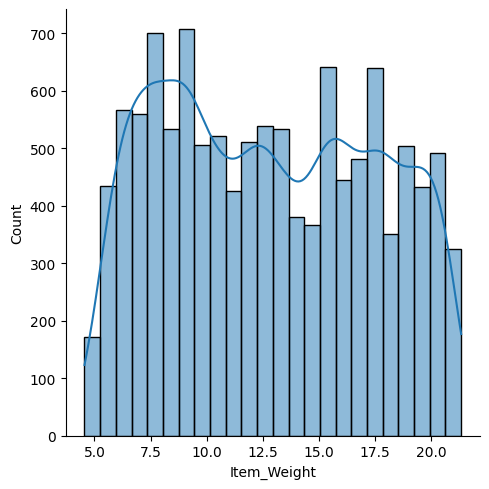

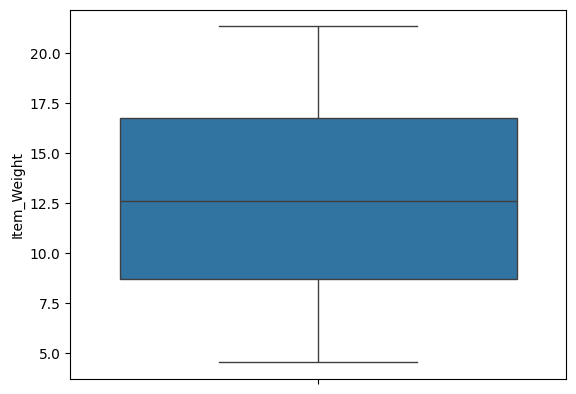

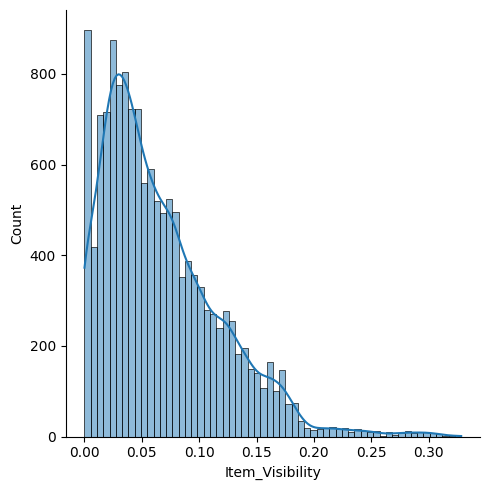

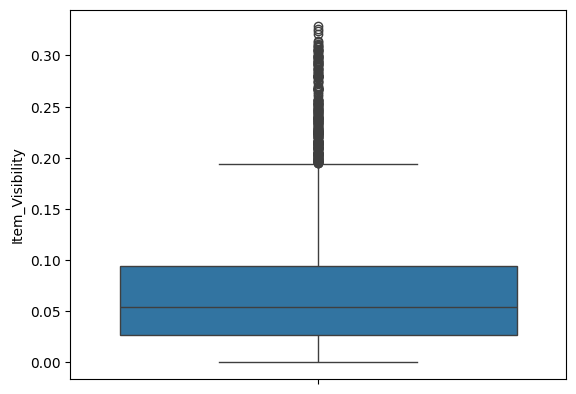

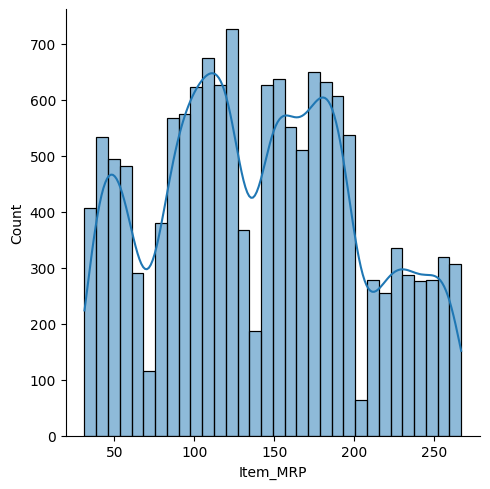

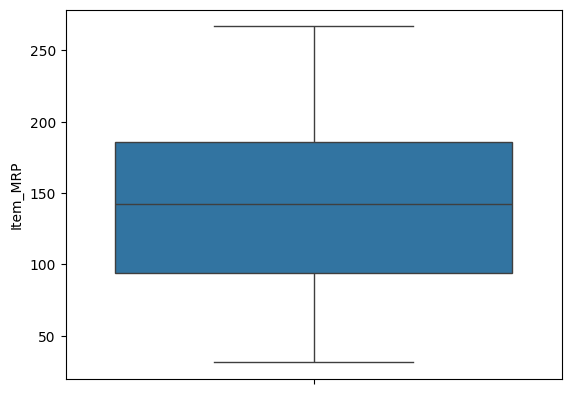

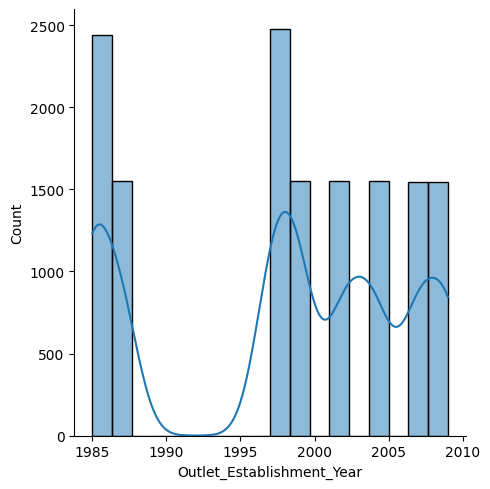

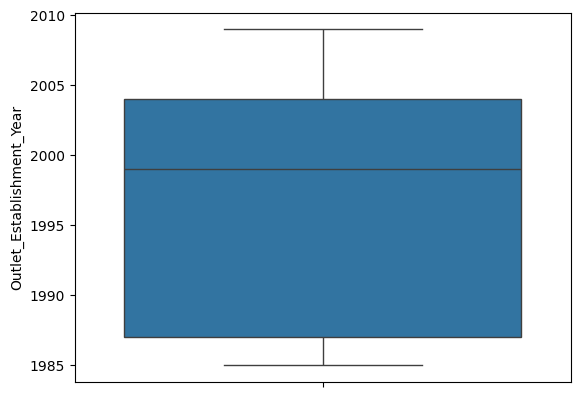

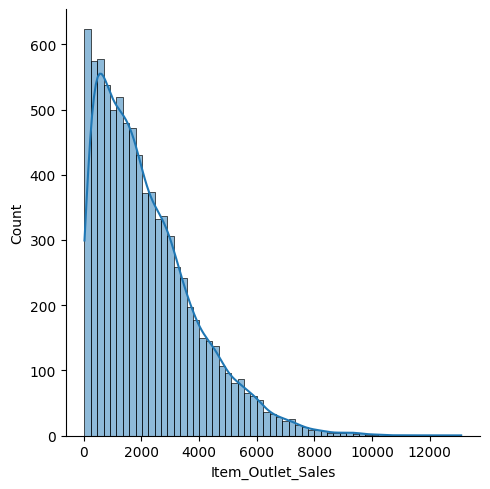

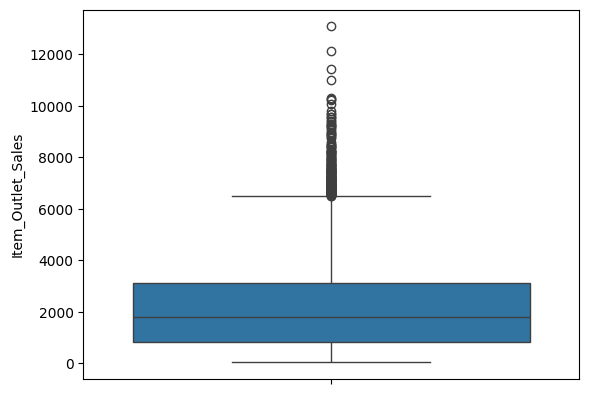

In [13]:
for i in data.select_dtypes(include="number"):
    sns.displot(data[i], kde="True")
    plt.show()
    sns.boxplot(data[i])
    plt.show()

<Axes: xlabel='count', ylabel='Item_Type'>

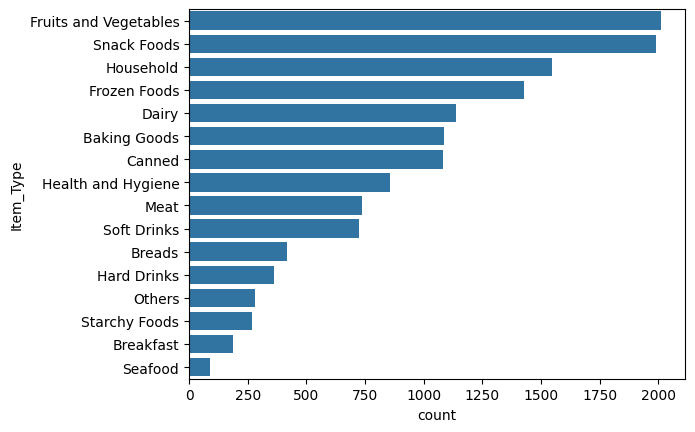

In [14]:
sns.countplot(data=data, y="Item_Type", order=data["Item_Type"].value_counts().index)

# Data Visualisation

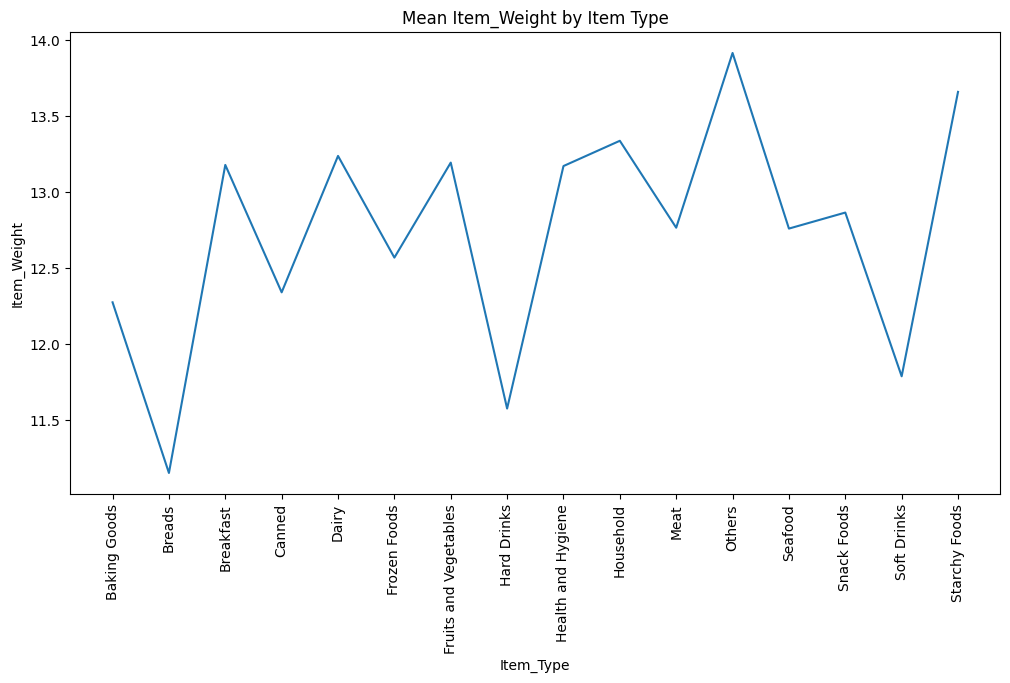

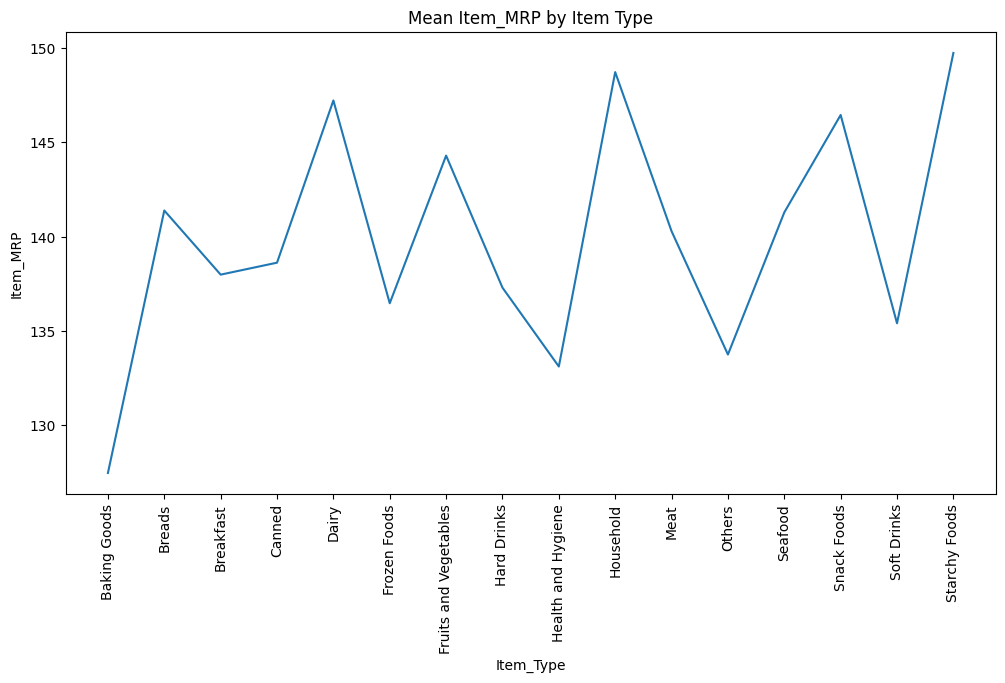

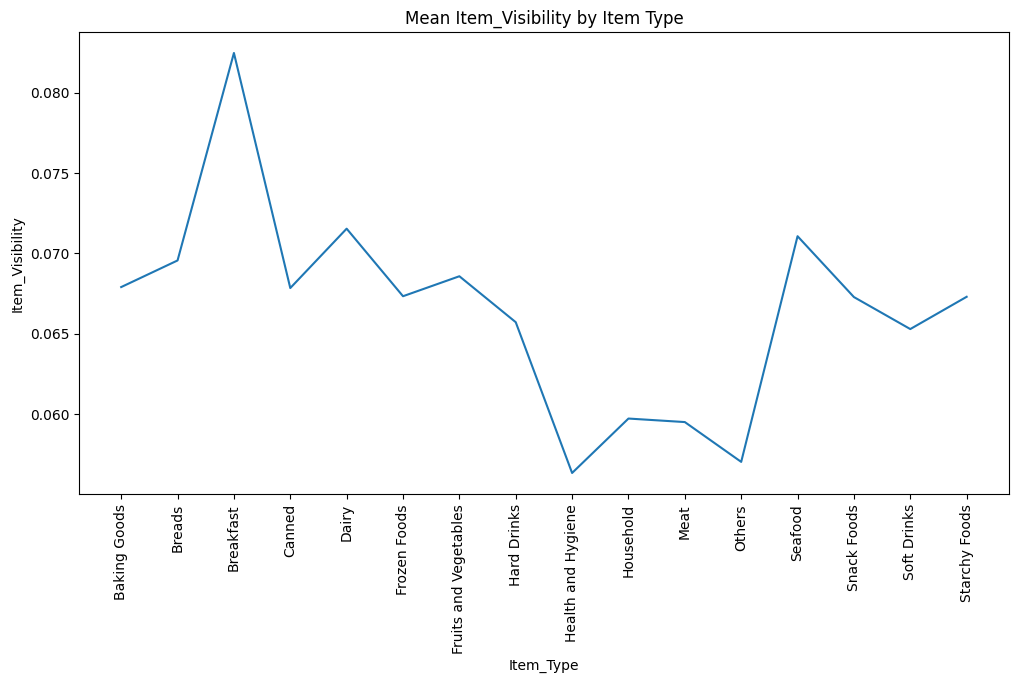

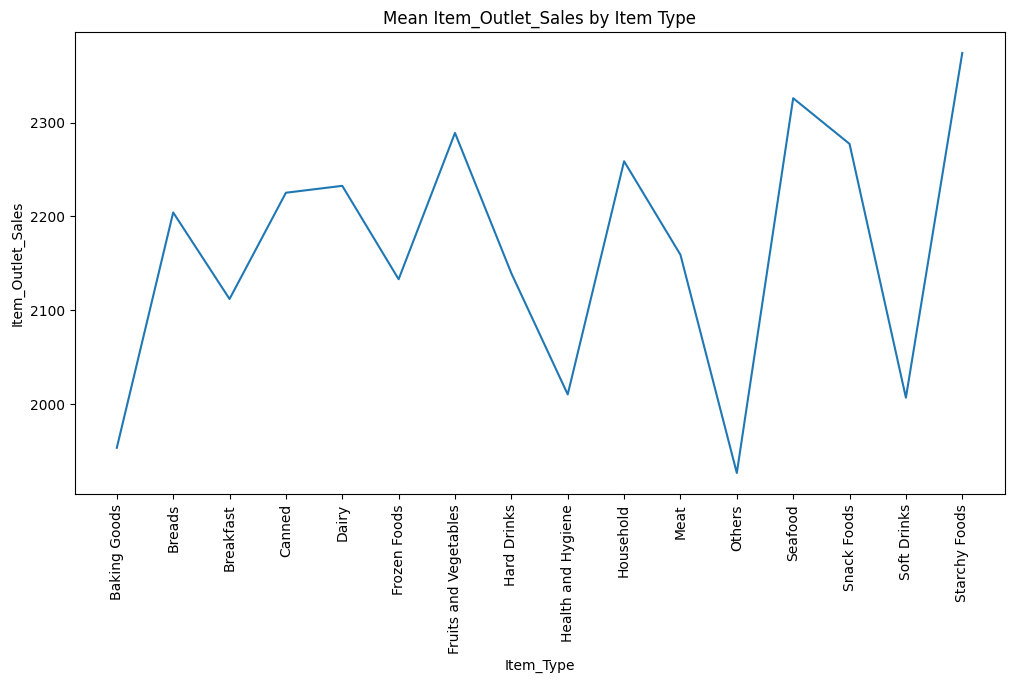

In [15]:
for i in ["Item_Weight","Item_MRP","Item_Visibility","Item_Outlet_Sales"]:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Item_Type", y=i, data=data[["Item_Type",i]].groupby(["Item_Type"]).mean())
    plt.xticks(rotation=90)
    plt.title(f'Mean {i} by Item Type')
    plt.show()


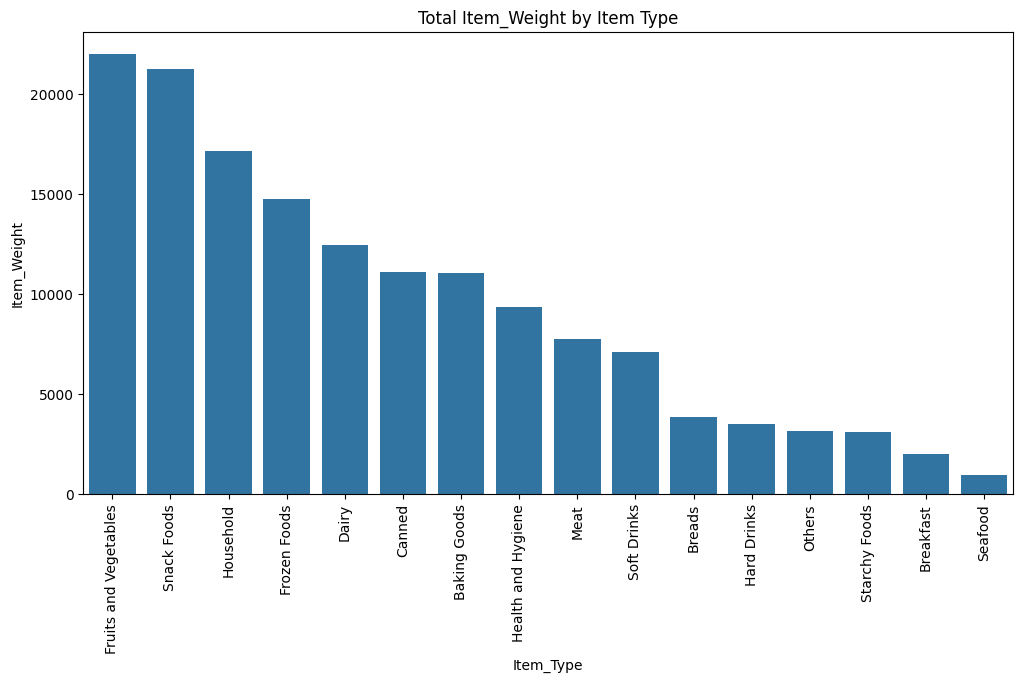

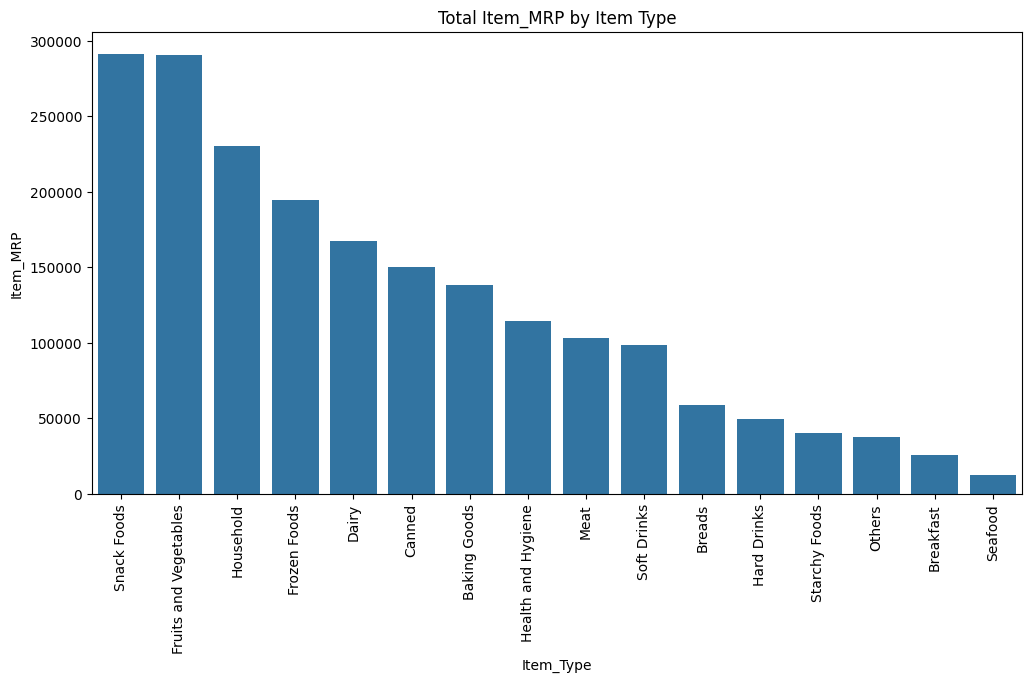

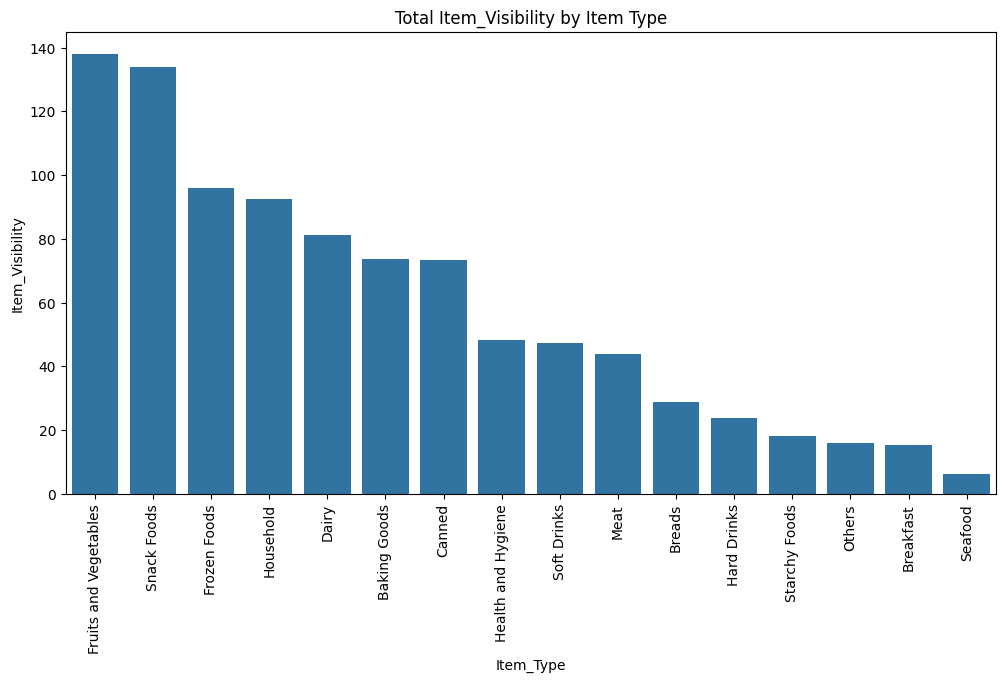

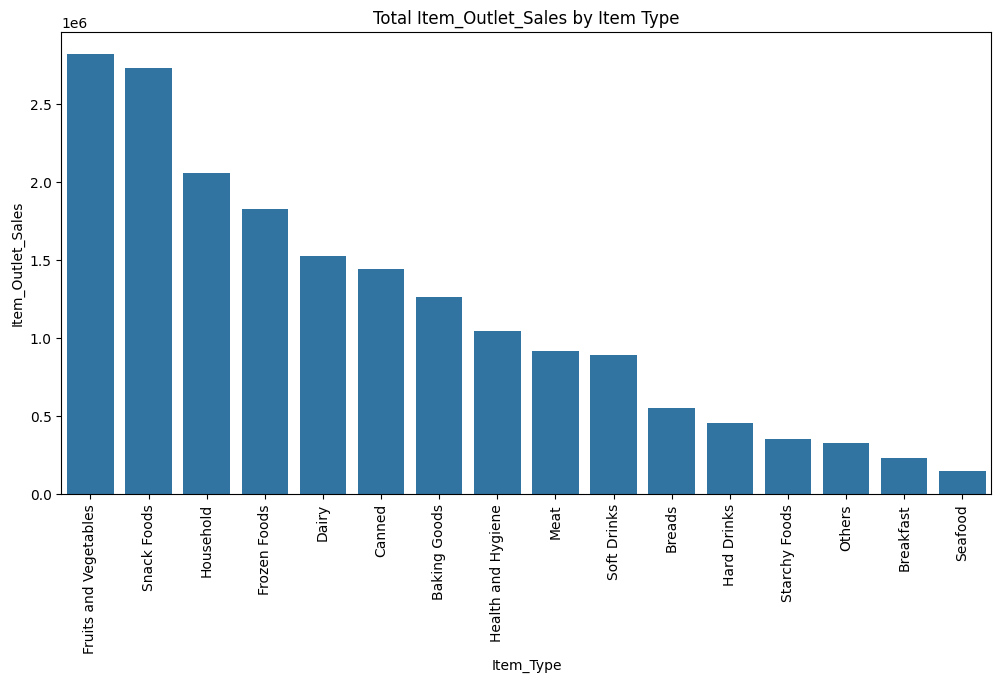

In [16]:
for i in ["Item_Weight","Item_MRP","Item_Visibility","Item_Outlet_Sales"]:
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Item_Type", y=i, data=data[["Item_Type",i]].groupby(["Item_Type"]).sum().sort_values([i],ascending=False
                                                                                                        ))
    plt.xticks(rotation=90)
    plt.title(f'Total {i} by Item Type')
    plt.show()


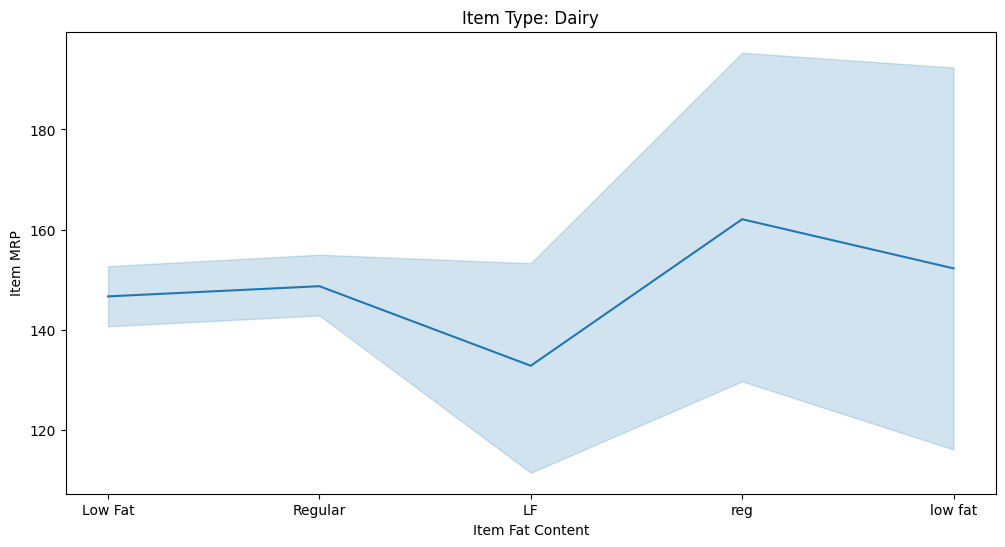

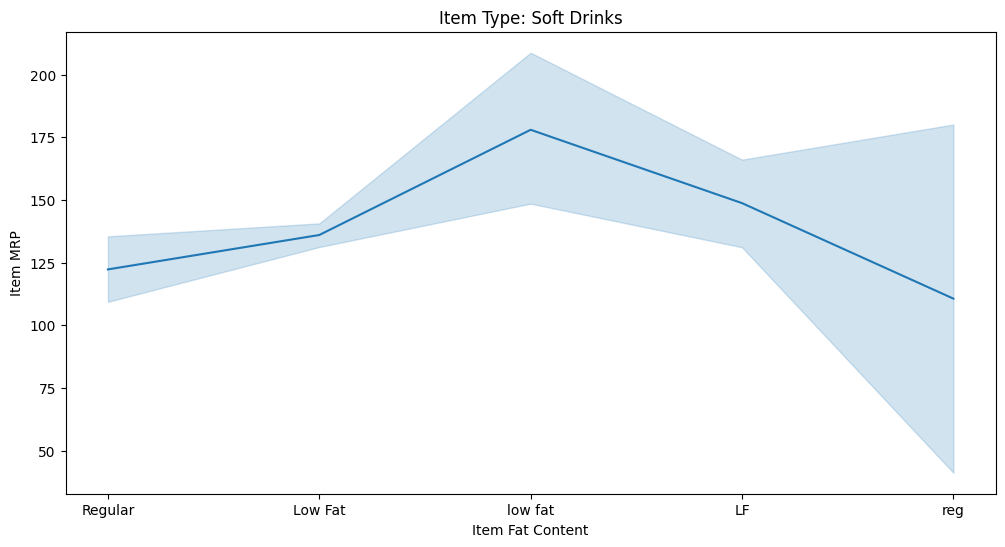

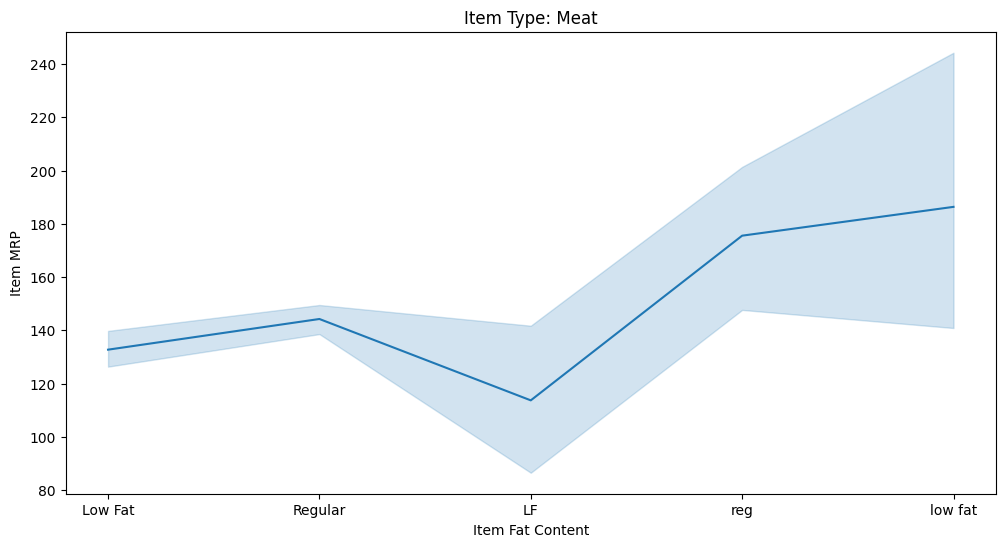

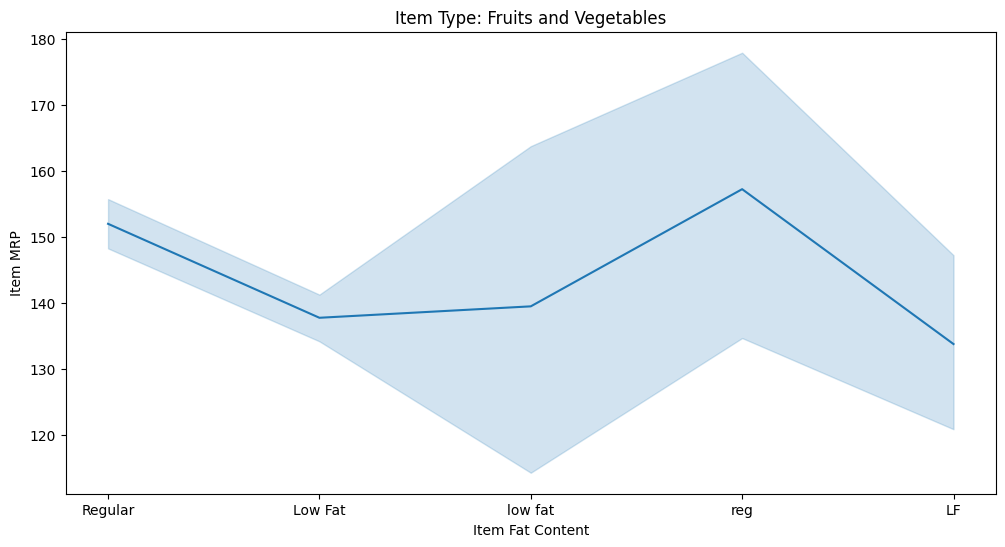

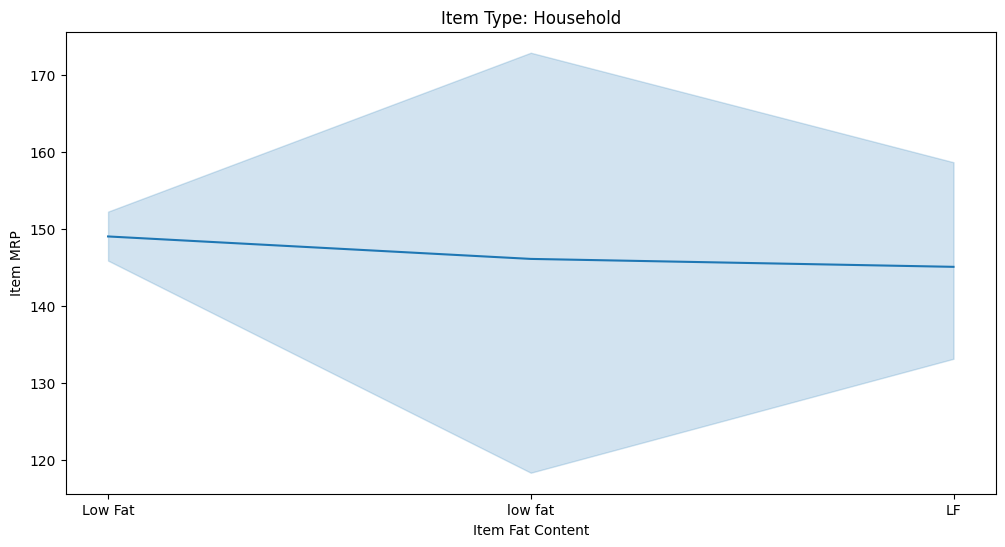

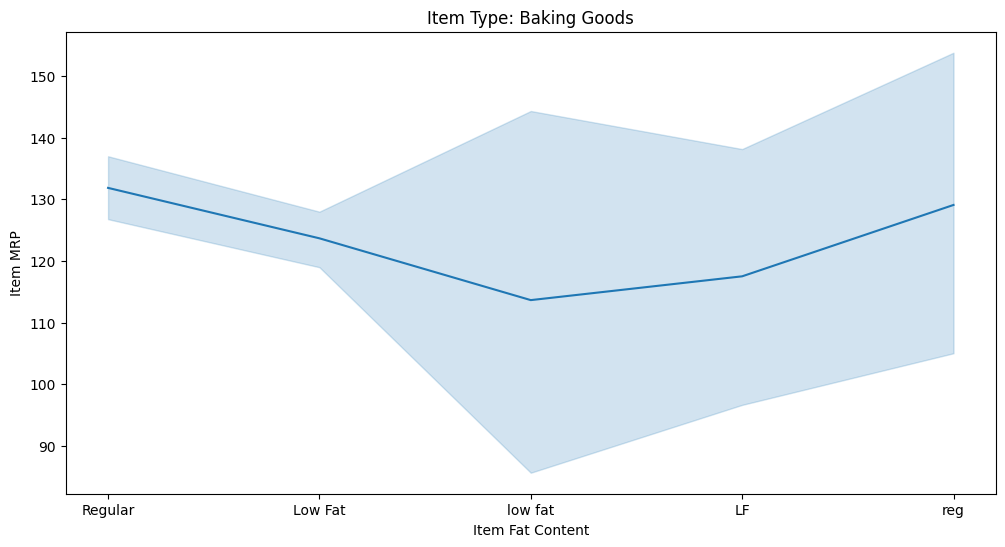

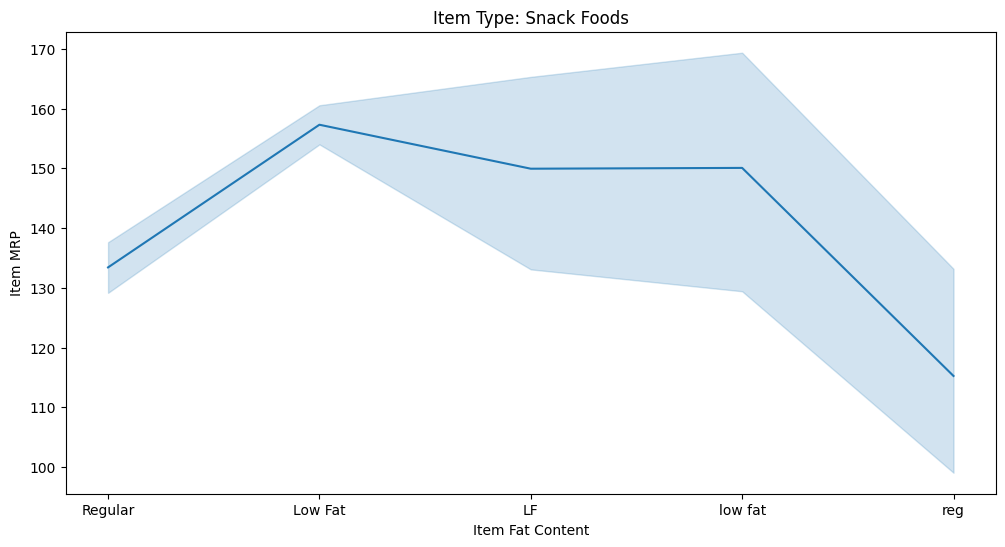

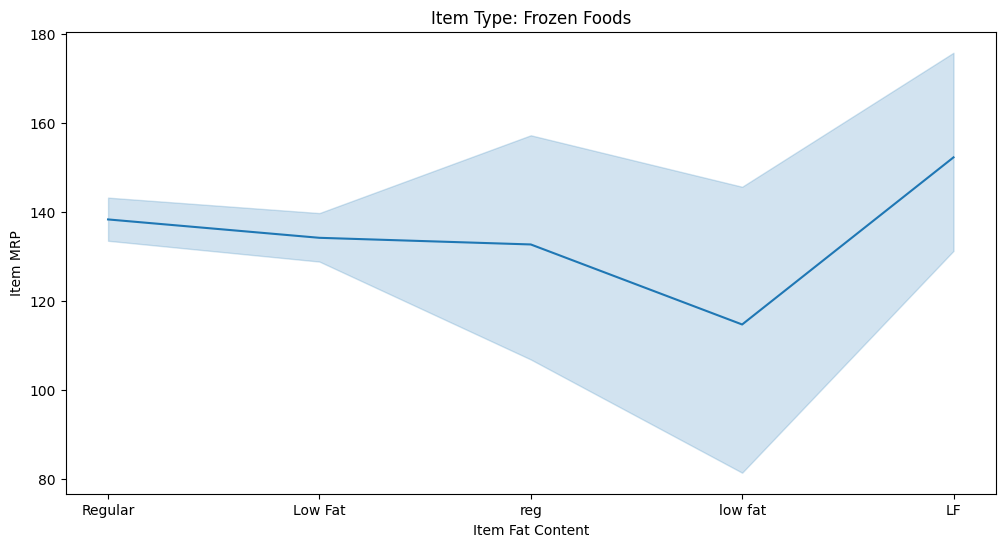

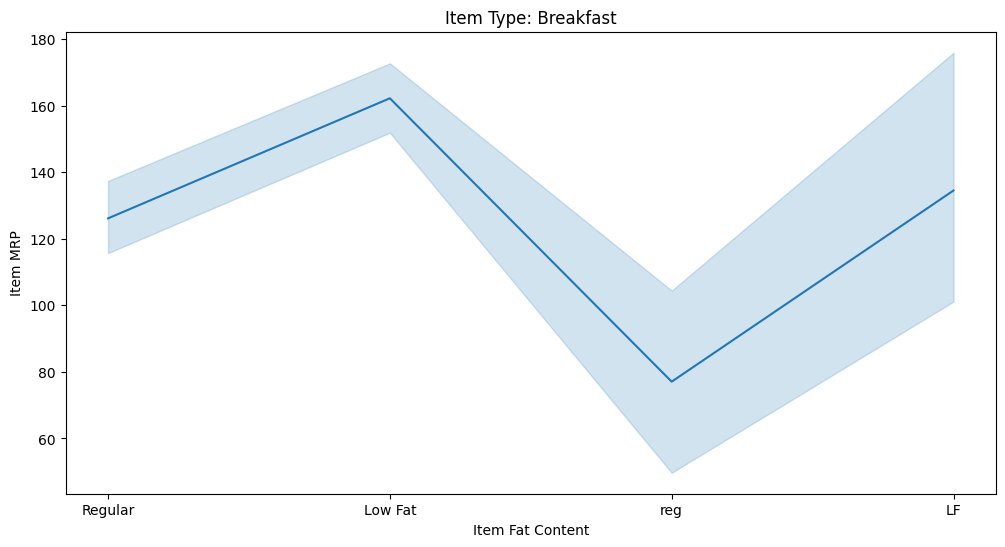

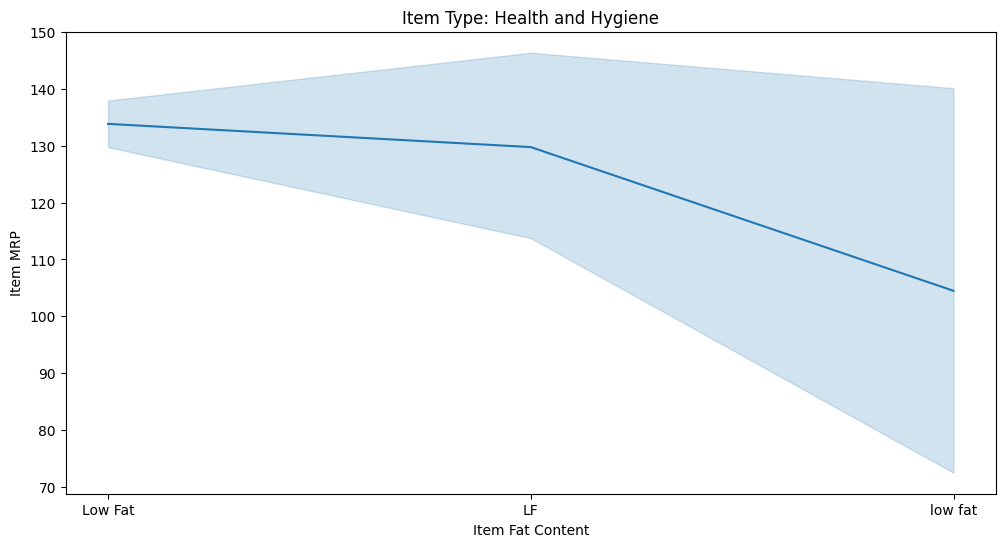

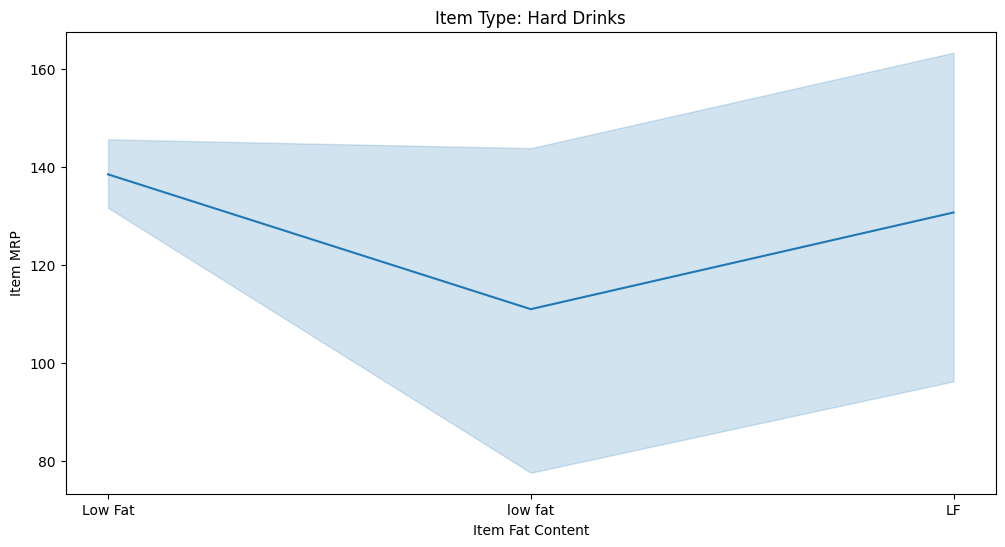

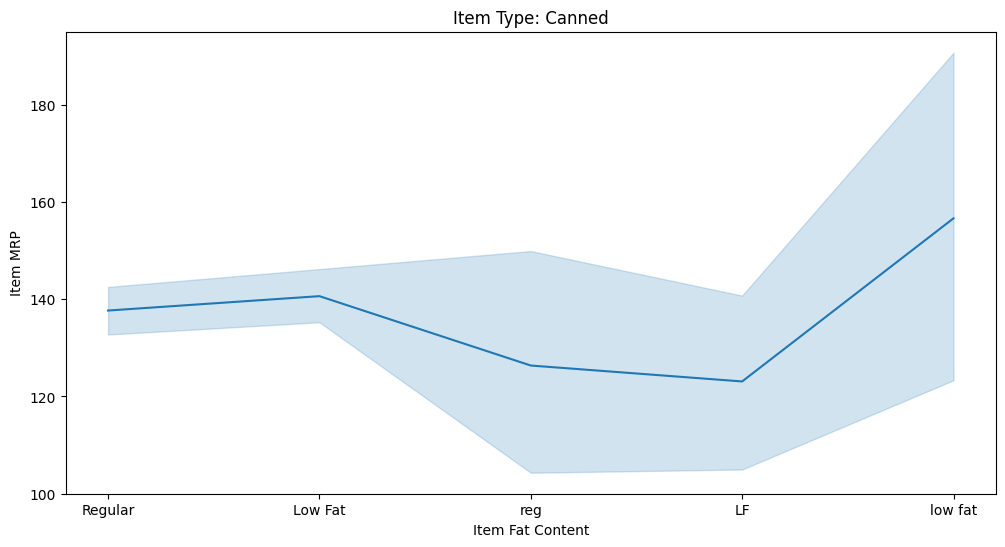

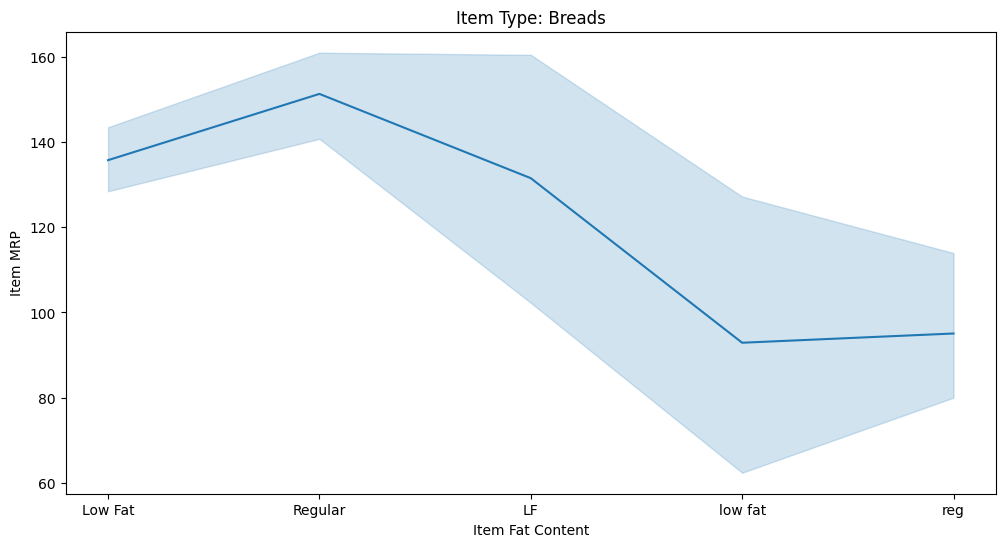

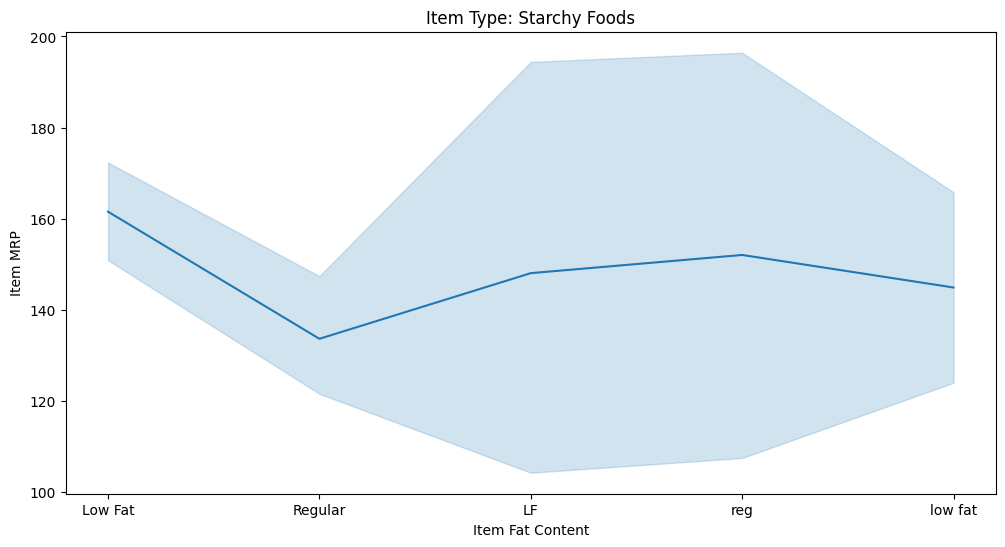

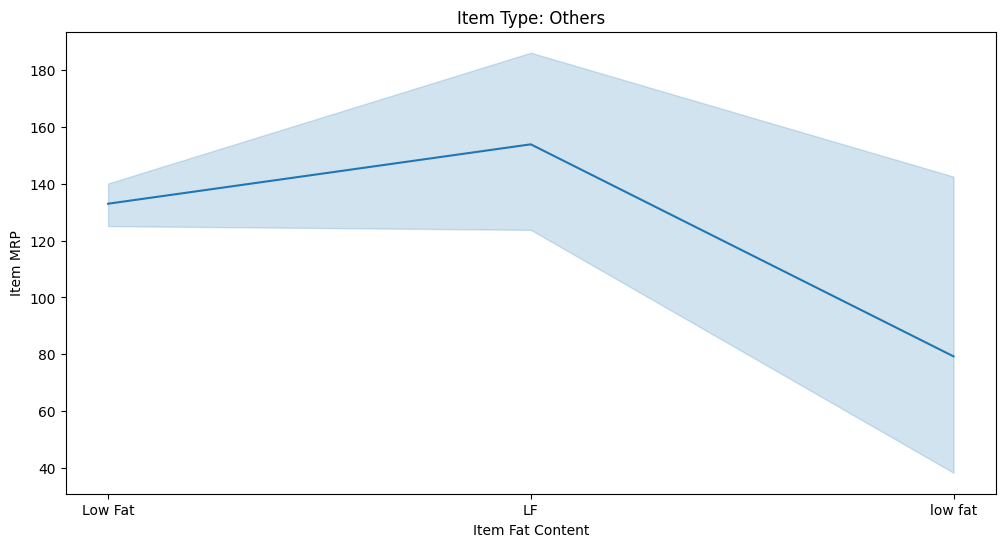

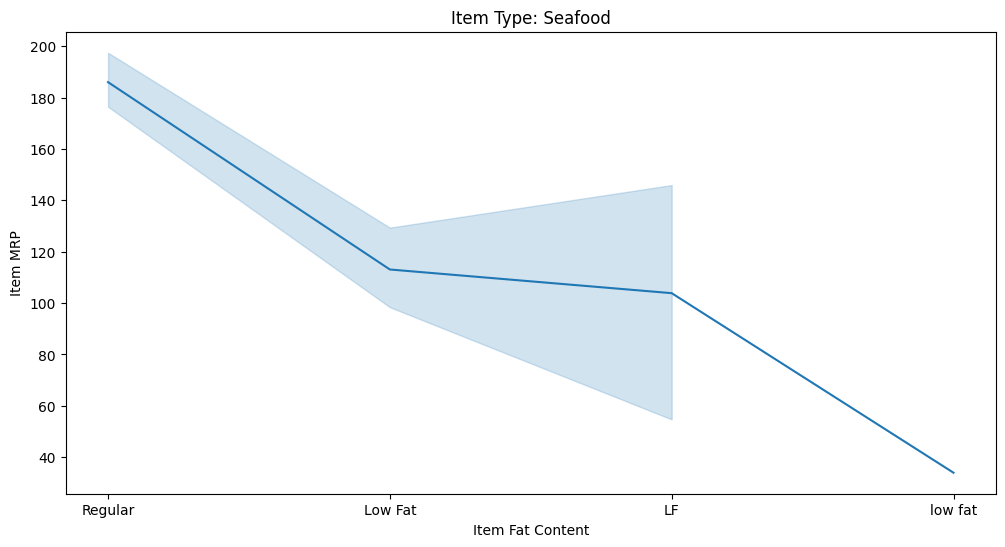

In [17]:
item_types = data["Item_Type"].unique()

for i, item_type in enumerate(item_types):
    plt.figure(figsize=(12, 6))
    sns.lineplot(y="Item_MRP", x="Item_Fat_Content", data=data[data["Item_Type"] == item_type])
    plt.xlabel("Item Fat Content")
    plt.ylabel("Item MRP")
    plt.title(f"Item Type: {item_type}")
    plt.show()

Text(0.5, 0, 'Outlet Type')

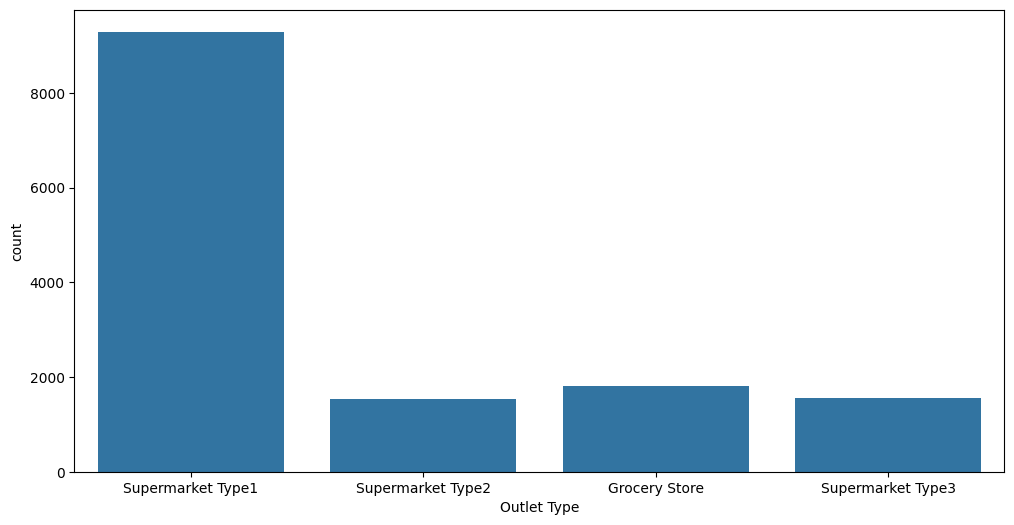

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x="Outlet_Type")
plt.xlabel("Count of Outlet Type")
plt.xlabel("Outlet Type")

Text(0.5, 0, 'Outlet Location Type')

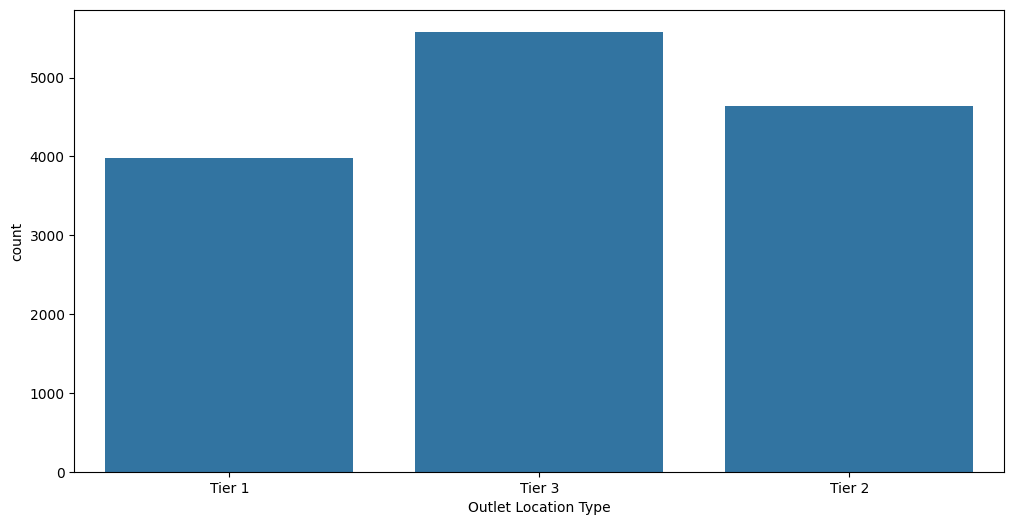

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x="Outlet_Location_Type")
plt.xlabel("Count of Outlet Location Type")
plt.xlabel("Outlet Location Type")

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

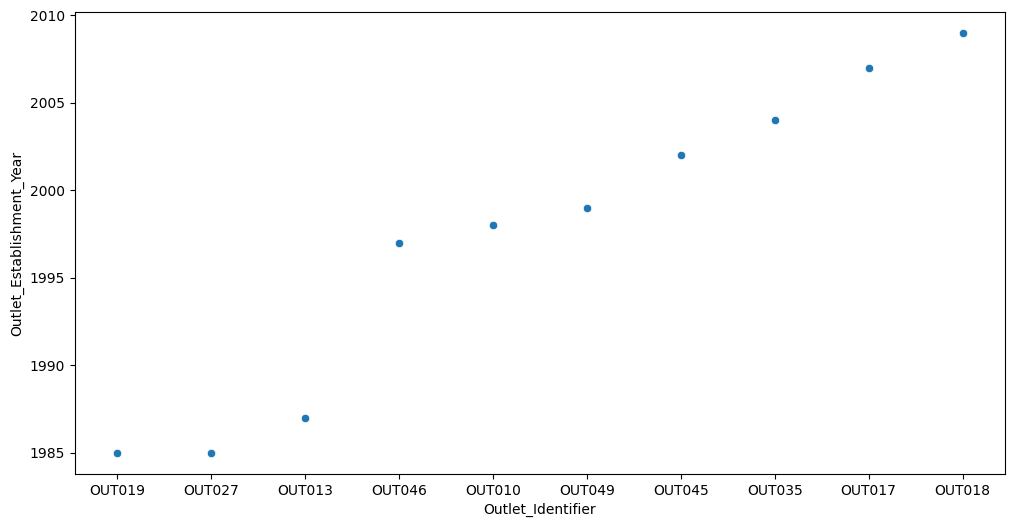

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data.groupby(["Outlet_Establishment_Year","Outlet_Identifier"]).sum(),x="Outlet_Identifier",y="Outlet_Establishment_Year")

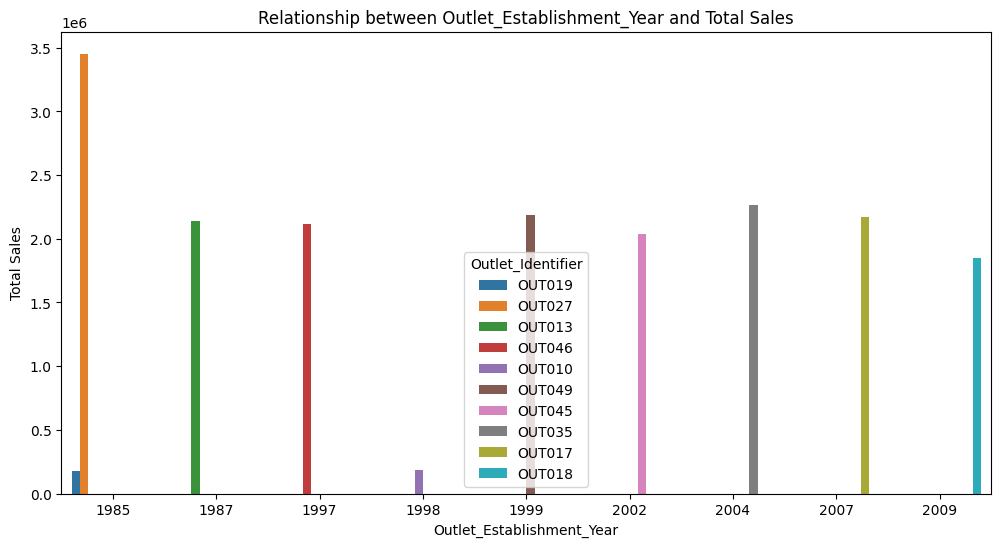

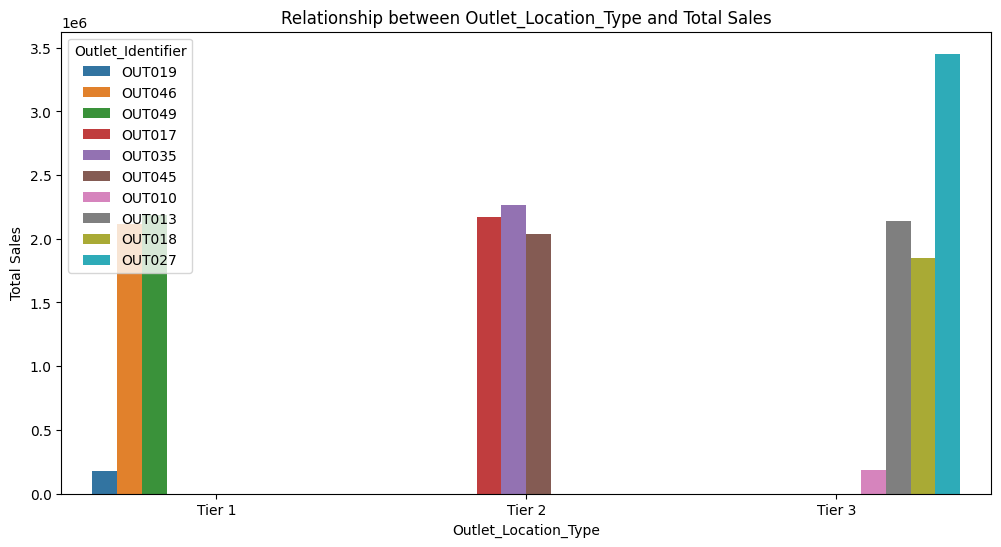

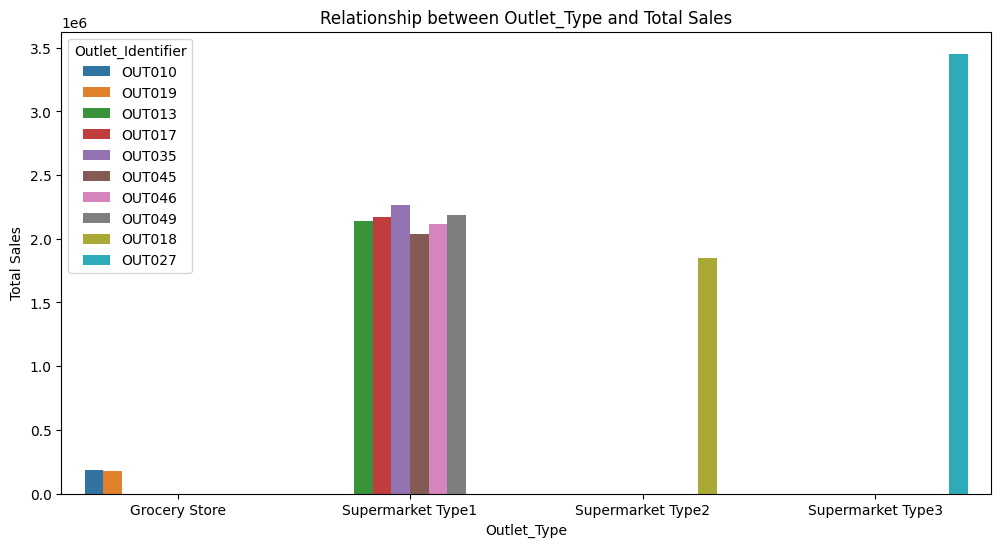

In [21]:
for i in ["Outlet_Establishment_Year", "Outlet_Location_Type", "Outlet_Type"]:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=data.groupby([i, "Outlet_Identifier"]).sum(),
        hue="Outlet_Identifier",
        x=i,
        y="Item_Outlet_Sales",
    )
    plt.xlabel(i)
    plt.ylabel("Total Sales")
    plt.title(f"Relationship between {i} and Total Sales")
    plt.show()

In [22]:
data["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

# Data preprocessing

We will begin with checking the Item_Fat_Content because that seems to be having sound suspicious unique values. There are different spellings to the same thing, which can be corrected to generalise the fat content, for example:-

- lf, low fat , LF can become Low Fat
- reg can become Regular

In [23]:
print(data["Item_Fat_Content"].unique())
data.replace(
    {"Item_Fat_Content": {"low_fat": "Low Fat", "lf": "Low Fat", "LF": "Low Fat"}},
    inplace=True,
)

data.replace({"Item_Fat_Content": {"reg": "Regular"}}, inplace=True)


print(data["Item_Fat_Content"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular' 'low fat']


## Treat Missing Data

### Treat the missing values for Item Weight

Since the item identifiers are duplicated in the dataset, it is possible that the weight has been entered in one observation but missing in another for the same item identifier, therefore, we are first checking what item identifiers have weights in one of the many recorded observations. We are substituting these observations with the present observation.

We also calculate what item identifiers do not have item weight in any of the recorded observations. We fill these item weight gaps using the mean of the weights of their item types. This has been supported by drawing a distribution plot for the weights of the items grouped by item types, to ensure we are not dealing with any outliers or exceptional cases, that may make our assumption erroneous. 

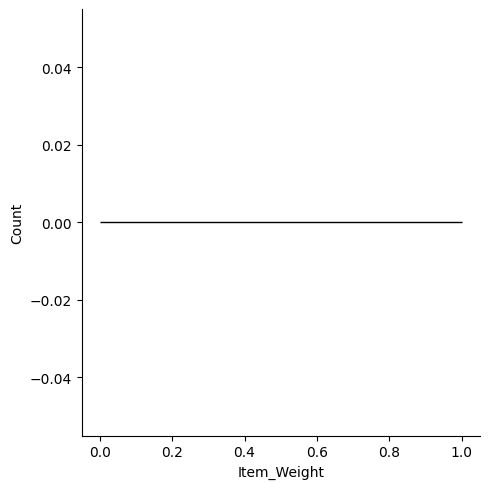

In [24]:
items_without_weight =  set(
    data.loc[data["Item_Weight"].isna()]["Item_Identifier"].unique()
)
items_with_item_weight = set(
    data.loc[-data["Item_Weight"].isna()]["Item_Identifier"].unique()
)
items_with_missing_weight = items_without_weight.intersection(
    items_with_item_weight
)

items_with_absent_weight = items_without_weight.difference(items_with_item_weight)

weight = data[
    (data["Item_Identifier"].isin(items_with_missing_weight))
    & (-data["Item_Weight"].isna())
].iloc[0]["Item_Weight"]

data.loc[
    data["Item_Identifier"].isin(items_with_missing_weight), "Item_Weight"
] = data.loc[
    data["Item_Identifier"].isin(items_with_missing_weight), "Item_Weight"
].fillna(
    weight
)


item_types = set()
item_types.update(
    set(
        data.loc[
            data["Item_Identifier"].isin(items_with_absent_weight),
            "Item_Type",
        ].unique()
    )
)
sns.displot(data=data[data["Item_Type"] == i], x="Item_Weight", kde=True)

average_weights = {}


for i in item_types:
    sns.displot(data=data[data["Item_Type"] == i], x="Item_Weight", kde=True)
    plt.title(f"Item Weight Distribution for Item Type {i}")
    average_weights[i] = data[data["Item_Type"] == i]["Item_Weight"].mean()

for i in items_with_absent_weight:
    data.loc[data["Item_Identifier"] == i, "Item_Weight"] = data.loc[
        data["Item_Identifier"] == i, "Item_Weight"
    ].fillna(
        average_weights.get(data.loc[data["Item_Identifier"] == i, "Item_Type"].iloc[0])
    )

### Treat the missing values for Outlet Size

Number of outlets that have sizes but missing in one of the rows of items: 0
Number of outlets that do not have sizes in any of the rows: 3
Outlets identifiers without any size: {'OUT045', 'OUT017', 'OUT010'}
             Outlet_Type Outlet_Location_Type Outlet_Size
3          Grocery Store               Tier 3         NaN
8      Supermarket Type1               Tier 2         NaN
9      Supermarket Type1               Tier 2         NaN
25     Supermarket Type1               Tier 2         NaN
28         Grocery Store               Tier 3         NaN
...                  ...                  ...         ...
14191      Grocery Store               Tier 3         NaN
14193  Supermarket Type1               Tier 2         NaN
14201  Supermarket Type1               Tier 2         NaN
14202  Supermarket Type1               Tier 2         NaN
14203  Supermarket Type1               Tier 2         NaN

[4016 rows x 3 columns]
['Tier 3' 'Tier 2']
['Grocery Store' 'Supermarket Type1']


Text(0, 0.5, 'Unique Outlet Size Count')

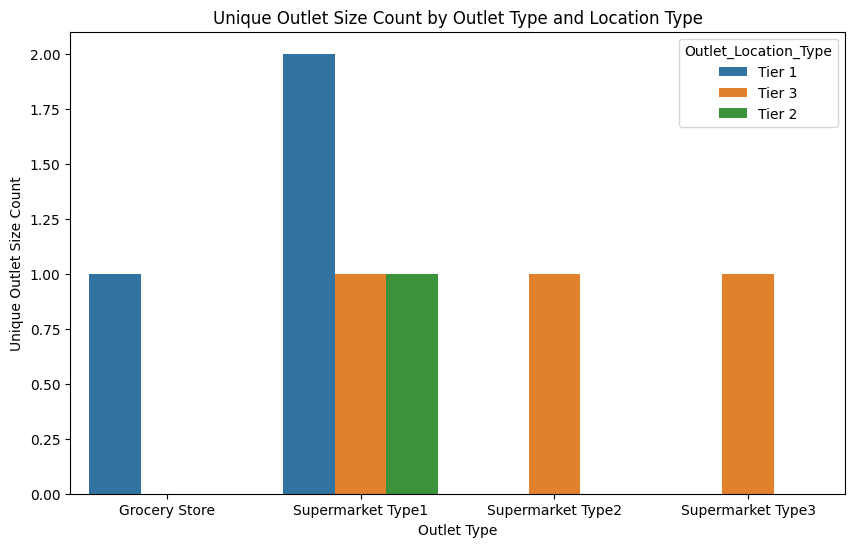

In [25]:
outlets_without_size = set(
    data.loc[data["Outlet_Size"].isna()]["Outlet_Identifier"].unique()
)
outlets_with_size = set(
    data.loc[-data["Outlet_Size"].isna()]["Outlet_Identifier"].unique()
)
outlets_with_missing_size = outlets_without_size.intersection(outlets_with_size)

outlets_with_absent_size = outlets_without_size.difference(outlets_with_size)

print(
    f"Number of outlets that have sizes but missing in one of the rows of items: {len(outlets_with_missing_size)}"
)

print(
    f"Number of outlets that do not have sizes in any of the rows: {len(outlets_with_absent_size)}"
)

print(f"Outlets identifiers without any size: {outlets_with_absent_size}")


print(
    data.loc[
        data["Outlet_Identifier"].isin(outlets_with_absent_size),
        ["Outlet_Type", "Outlet_Location_Type", "Outlet_Size"],
    ]
)

print(
    data.loc[
        data["Outlet_Identifier"].isin(outlets_with_absent_size),
        "Outlet_Location_Type",
    ].unique()
)

print(
    data.loc[
        data["Outlet_Identifier"].isin(outlets_with_absent_size),
        "Outlet_Type",
    ].unique()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Outlet_Type",
    y="Unique_Size_Count",
    hue="Outlet_Location_Type",
    data=data.groupby(["Outlet_Type", "Outlet_Location_Type"])["Outlet_Size"]
    .nunique()
    .reset_index(name="Unique_Size_Count"),
)
plt.title("Unique Outlet Size Count by Outlet Type and Location Type")
plt.xlabel("Outlet Type")
plt.ylabel("Unique Outlet Size Count")


In [26]:
data.loc[
    data["Outlet_Location_Type"].isin(["Tier 3"]),
    ["Outlet_Identifier", "Outlet_Size"],
]["Outlet_Size"].unique()

data.loc[
    data["Outlet_Type"].isin(["Grocery Store"]),
    ["Outlet_Identifier", "Outlet_Size"],
]["Outlet_Size"].unique()

array([nan, 'Small'], dtype=object)

## Encoding Categorical Data

#### Label Encoding Outlet_Location_Type, Label Encoding Outlet_Size

In [27]:
for i in ["Outlet_Location_Type", "Outlet_Size", "Item_Fat_Content"]:
    data[i] = LabelEncoder().fit_transform(data[i].ravel())

### One-Hot Encoding Item_Fat_Content, Item_Type, "Outlet_Type"

In [28]:
data = pd.get_dummies(data, columns=["Item_Type", "Outlet_Type"])

#### Standardise or Normalise the Outlet_Establishment_Year

In [29]:
data["Outlet_Establishment_Year"] = MinMaxScaler().fit_transform(
    data["Outlet_Establishment_Year"].values.reshape(-1, 1)
)
data["Outlet_Establishment_Year_Normalised"] = normalize(
    data["Outlet_Establishment_Year"].values.reshape(-1, 1), axis=0
)

In [30]:
data.replace({True: 1, False: 0}, inplace=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_Normalised
0,FDA15,9.30,0,0.016047,249.8092,OUT049,0.583333,1,0,3735.1380,...,0,0,0,0,0,0,1,0,0,0.007668
1,DRC01,5.92,1,0.019278,48.2692,OUT018,1.000000,1,2,443.4228,...,0,0,0,1,0,0,0,1,0,0.013144
2,FDN15,17.50,0,0.016760,141.6180,OUT049,0.583333,1,0,2097.2700,...,0,0,0,0,0,0,1,0,0,0.007668
3,FDX07,19.20,1,0.000000,182.0950,OUT010,0.541667,3,2,732.3800,...,0,0,0,0,0,1,0,0,0,0.007120
4,NCD19,8.93,0,0.000000,53.8614,OUT013,0.083333,0,2,994.7052,...,0,0,0,0,0,0,1,0,0,0.001095


# Machine Learning

## Model 1: Random Forest 

In [31]:
data = data.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type_Others'])

In [32]:
#seperating test data from combined dataset (rows with NaN values in 'Item_Outlet_Sales')
test_df = data[data['Item_Outlet_Sales'].isna()]

#separating training data from combined dataset (without NaN values in 'Item_Outlet_Sales')
train_df = data.dropna(subset=['Item_Outlet_Sales'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

#splitting  training data
X = train_df.drop('Item_Outlet_Sales', axis=1)
y = train_df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating the ML model (Random Forest Regressor) 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#training the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Random Forest Model Evaluation on Training Set:
R-squared (R2 Score): 0.9370438136997076
Mean Squared Log Error: 0.06845271737529833


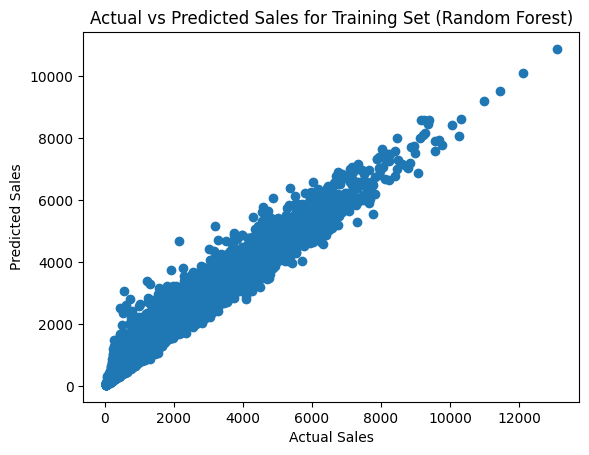

In [34]:
#prediction on training set
y_pred_train_rf = rf_model.predict(X_train)

#model evaluation on training set
r2_train_rf = r2_score(y_train, y_pred_train_rf)
msle_train = mean_squared_log_error(y_train, y_pred_train_rf)

print("Random Forest Model Evaluation on Training Set:")
print("R-squared (R2 Score):", r2_train_rf)
print("Mean Squared Log Error:", msle_train)

#visualizing predicted vs actual values for training set
plt.scatter(y_train, y_pred_train_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales for Training Set (Random Forest)")
plt.show()


Random Forest Model Evaluation on Test Set:
R-squared (R2 Score): 0.5553784547100012
Mean Squared Log Error: 0.30699871071350515


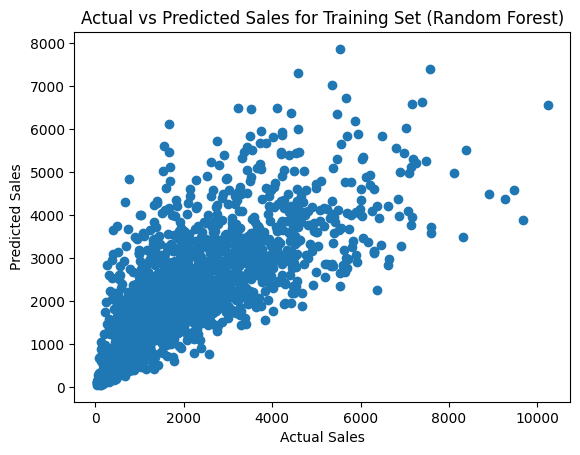

In [35]:
#prediction on test set
y_pred_test_rf = rf_model.predict(X_test)

#model evaluation on test set
r2_test_rf = r2_score(y_test, y_pred_test_rf)
msle_test = mean_squared_log_error(y_test, y_pred_test_rf)

print("\nRandom Forest Model Evaluation on Test Set:")
print("R-squared (R2 Score):", r2_test_rf)
print("Mean Squared Log Error:", msle_test)

#visualizing predicted vs actual values for test set
plt.scatter(y_test, y_pred_test_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales for Training Set (Random Forest)")
plt.show()


The model's high R2 score (0.937) and low MSLE (0.068) on the training set indicate strong performance, but the lower R2 score (0.555) and higher MSLE (0.306) on the test set suggest overfitting. To address this, a new DataFrame based on feature importance is created to simplify the model and improve generalization.

                                 Feature  Importance
3                               Item_MRP    0.445293
21             Outlet_Type_Grocery Store    0.193082
2                        Item_Visibility    0.102894
24         Outlet_Type_Supermarket Type3    0.058589
0                            Item_Weight    0.053544
25  Outlet_Establishment_Year_Normalised    0.038705
4                            Outlet_Size    0.014327
1                       Item_Fat_Content    0.010413
5                   Outlet_Location_Type    0.008595
12       Item_Type_Fruits and Vegetables    0.008444
18                 Item_Type_Snack Foods    0.008271
15                   Item_Type_Household    0.006498
10                       Item_Type_Dairy    0.006447
11                Item_Type_Frozen Foods    0.005972
19                 Item_Type_Soft Drinks    0.004996
9                       Item_Type_Canned    0.004598
6                 Item_Type_Baking Goods    0.004390
14          Item_Type_Health and Hygiene    0.

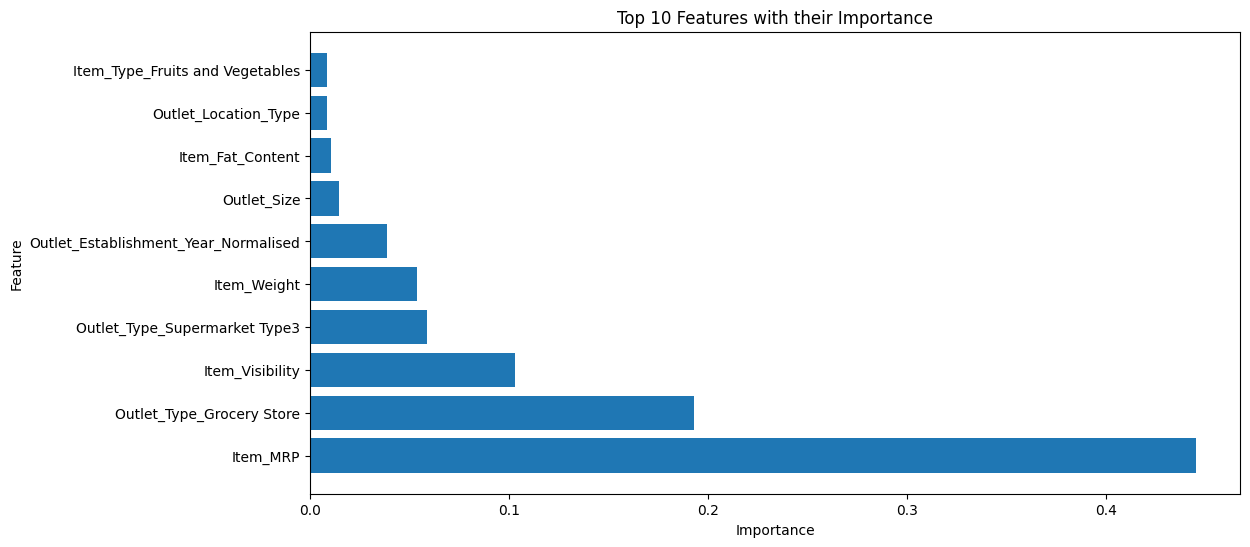

In [36]:
#to get feature importances
feature_importances = rf_model.feature_importances_

#creating a df to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

#sorting df by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

#plotting the top 10 features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features with their Importance')
plt.show()

Random Forest Model Evaluation on Training Set (Selected Features):
R-squared (R2 Score): 0.7065702676147814
Mean Squared Log Error: 0.21731804774023197


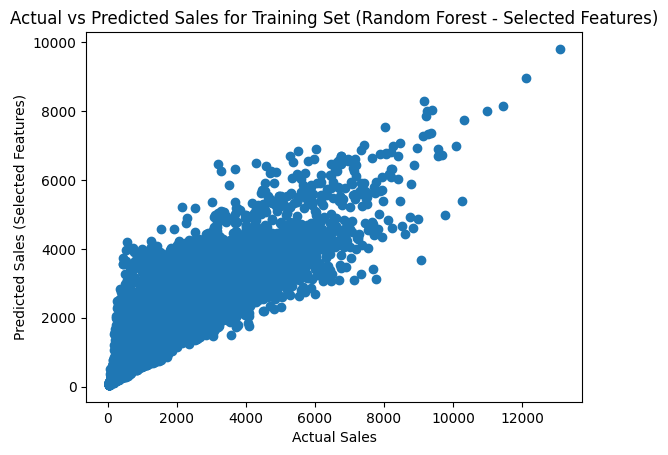

In [37]:
#setting a threshold for feature importance
threshold = 0.02 

#to select features with importance above the threshold
selected_features = feature_importance_df.loc[feature_importance_df['Importance'] >= threshold, 'Feature']

#filtering columns based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#training a new Random Forest model on the selected features
new_rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
new_rf_model.fit(X_train_selected, y_train)

#prediction on the training set
y_pred_train_selected = new_rf_model.predict(X_train_selected)

#model evaluation on the training set
r2_train_selected = r2_score(y_train, y_pred_train_selected)
msle_train_sel = mean_squared_log_error(y_train, y_pred_train_selected)

print("Random Forest Model Evaluation on Training Set (Selected Features):")
print("R-squared (R2 Score):", r2_train_selected)
print("Mean Squared Log Error:", msle_train_sel)

#visualizing predicted vs actual values for training set
plt.scatter(y_train, y_pred_train_selected)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Selected Features)")
plt.title("Actual vs Predicted Sales for Training Set (Random Forest - Selected Features)")
plt.show()



Random Forest Model Evaluation on Test Set (Selected Features):
R-squared (R2 Score): 0.5990875706995739
Mean Squared Log Error: 0.2969417345988403


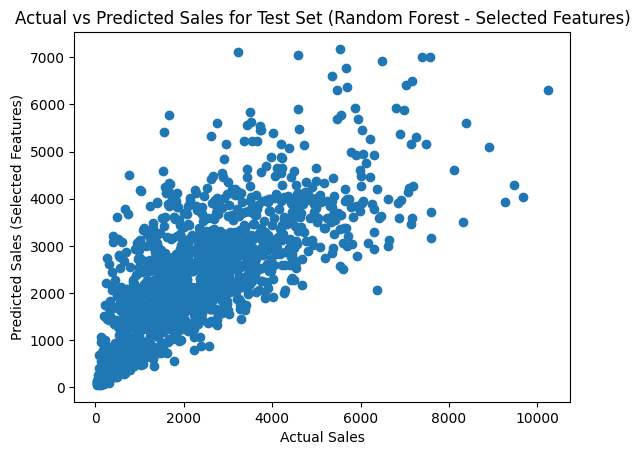

In [38]:
#prediction on test set
y_pred_test_selected = new_rf_model.predict(X_test_selected)

#model evaluation on test set
r2_test_selected = r2_score(y_test, y_pred_test_selected)
msle_test_sel = mean_squared_log_error(y_test, y_pred_test_selected)

print("\nRandom Forest Model Evaluation on Test Set (Selected Features):")
print("R-squared (R2 Score):", r2_test_selected)
print("Mean Squared Log Error:", msle_test_sel)

#visualizing predicted vs actual values for the test set
plt.scatter(y_test, y_pred_test_selected)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Selected Features)")
plt.title("Actual vs Predicted Sales for Test Set (Random Forest - Selected Features)")
plt.show()

The updated model shows a slightly lower R2 score (0.706) and higher MSLE (0.217) on the training data compared to the previous one. However, its R2 score (0.599) and MSLE (0.296) on the test data are closer to the training metrics and higher than the previous model's test metrics. 

This indicates improved generalization and better overall performance, highlighting the effectiveness of the adjustment based on feature importance.